# Time series I: Fourier Transform

Fourier analysis is the study of the way general functions may be represented or approximated by sums of simpler trigonometric functions. By decomposing a function in this sum we can get informations about the frequency of the period of these functions.
When we do a Fourier transform of a function of time, we decompose it into the frequencies that make it up.

$$ \hat{f}(\omega) = \int_{-\infty}^{\infty} f(t)\ e^{- 2\pi i x \omega}\,dt $$

## Discrete Fourier Transform (DFT)
Discrete-time Fourier transform (DTFT) is a form of Fourier analysis that is applicable to uniformly-spaced samples of a continuous function. The term discrete-time refers to the fact that the transform operates on discrete data (samples) whose interval often has units of time.

$$ F(\omega) = \sum_{n=0}^{N-1} x[n] \,e^{-i \omega n} $$

### Example:


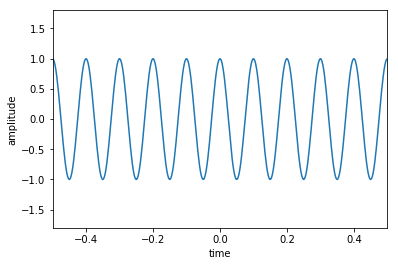

In [8]:
import matplotlib.pyplot as plt
import numpy as np
N = 400
fs = 400
#t = np.arange(-.5, .5, 1.0/fs)
t = np.linspace(-.5, .5, N)
f0 = 10
phi = np.pi/2
A =  1
x = A * np.sin(2 * np.pi * f0 * t + phi)
plt.plot(t, x)
plt.axis([-.5, .5, -1.8, 1.8])
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

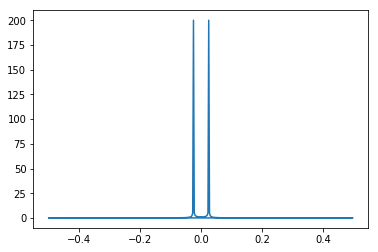

In [9]:
DFT = np.fft.fft(x)
freq = np.fft.fftfreq(x.size)
plt.plot(freq, np.abs(DFT))
plt.show()

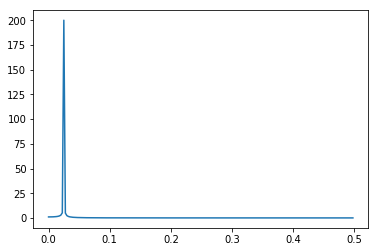

In [10]:
half = len(x) // 2
plt.plot(freq[:half], np.abs(DFT[:half]))
plt.show()

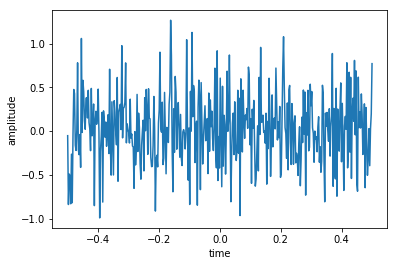

In [11]:
# 0 is the mean of the normal distribution you are choosing from
# .4 is the standard deviation of the normal distribution
# N is the number of elements you get in array noise
noise = np.random.normal(0,.4,N)

plt.plot(t, noise)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

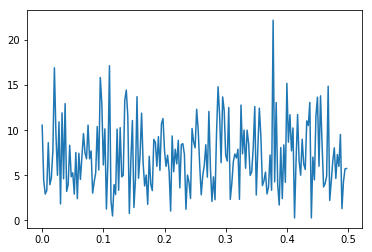

In [15]:
DFT = np.fft.fft(noise)
freq = np.fft.fftfreq(noise.size)
plt.plot(freq[:half], np.abs(DFT[:half]))
plt.show()

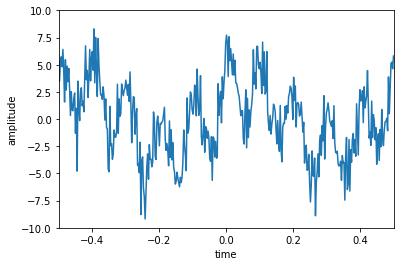

In [17]:
f1 = 10
f2 = 2

phi_1 = np.pi/3
phi_2 = np.pi/4

B = 2
C = 3
D = 4
noise = D*np.random.normal(0,.4,N)

S = A*np.sin(2*np.pi*f0*t + phi) + B*np.sin(2*np.pi*f1*t + phi_1) + C*np.sin(2*np.pi*f2*t + phi_2) + noise

plt.plot(t, S)
plt.axis([-.5, .5, -10, 10])
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

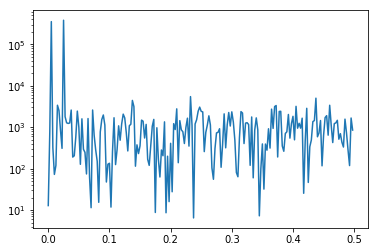

In [21]:
DFT = np.fft.fft(S)
freq = np.fft.fftfreq(S.size)
plt.plot(freq[:half], np.abs(DFT[:half]) ** 2)
plt.yscale("log")
plt.show()

## Real signal
The Fourier Transform of a real signal is Hermitian-symmetric: the negative frequency terms are the complex conjugate of the positive frequency terms. This is why the package **`numpy.fft`** includes an optimized version of the DFT --- **`rfft`** --- that returns only half the terms.

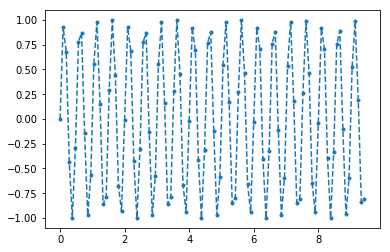

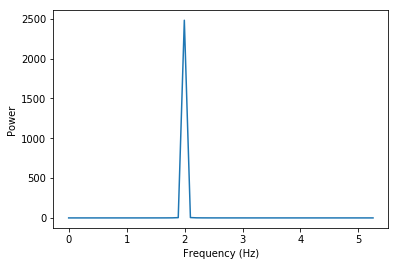

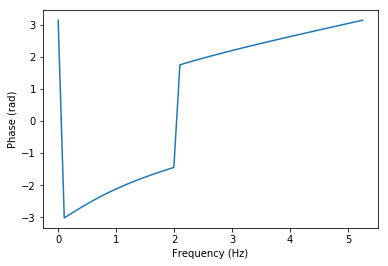

In [22]:
duration = 3 * np.pi
period = 0.5
n_samples = 100

t = np.linspace(0, duration, n_samples)
signal = np.sin(2 * np.pi * t / period)
plt.plot(t, signal, ".--")
plt.show()

DFT = np.fft.rfft(signal)
freq = np.fft.rfftfreq(n=signal.size, d=t[1]-t[0])
power_spectrum = np.abs(DFT) ** 2.0
phase_spectrum = np.angle(DFT)

plt.plot(freq, power_spectrum, "-")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.show()
plt.plot(freq, phase_spectrum, "-")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (rad)")
plt.show()

## Hands-on Fourier Transform
### Let's automate the procedure...
We can define functions that create signals of multiple components, perform Discrete Fourier Transform and reconstruct signals:

- `get_spectra` takes a signal as input and returns the frequencies, the power and phase spectra of the DFT of a **real** signal
- `sinus` creates a sinusoidal signal of **n** points with a specified **amplitude**, **period** (in number of sampling intervals) and a **phase** (in radians)
- `noise` creates Gaussian noise of **n** points of certain **amplitude** (= standard deviation)
- `reconstruct` creates a signal. The input is the number of points of the signal, and lists of frequencies, powers and phases for the components.

In [35]:
def get_spectra(signal):
    transform = np.fft.rfft(signal)
    frequencies = np.fft.rfftfreq(signal.size)
    power_spectrum = np.abs(transform) ** 2
    phase_spectrum = np.angle(transform)
    return frequencies, power_spectrum, phase_spectrum

def sinus(n_points, amplitude, period, phase):
    return amplitude * np.sin(np.arange(n_points) * (2 * np.pi / period) + phase)

def noise(n_points, amplitude):
    return np.random.normal(scale=amplitude, size=n_points)

def reconstruct(n, frequencies, powers, phases):
    amplitudes = powers ** 0.5
    signal = np.zeros(n)
    for i in range(1, len(amplitudes)):
        if frequencies[i] == 0.0:
            signal += amplitudes[i]
        else:
            signal += sinus(n, 2 * amplitudes[i], 1 / frequencies[i], phases[i] + np.pi / 2.0)
    signal = signal / n
    return signal


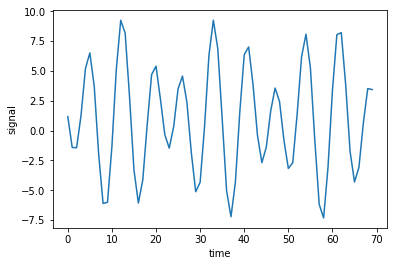

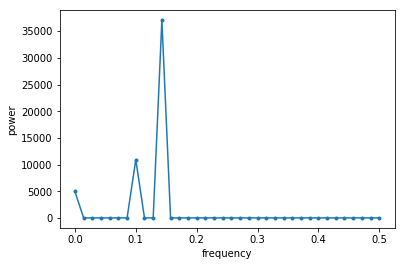

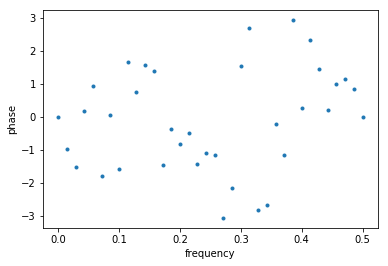

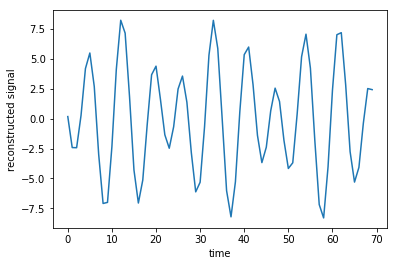

In [36]:
n = 70
t = np.arange(n)
signal = 1.0 + sinus(n, 3.0, 10.0, 0.0) + sinus(n, 5.5, 7.0, np.pi) + noise(n, 0.1)
freqs, power_spectrum, phase_spectrum = get_spectra(signal)
reconstructed_signal = reconstruct(n, freqs, power_spectrum, phase_spectrum)

plt.plot(t, signal, "-")
plt.xlabel("time"); plt.ylabel("signal")
plt.show()

plt.plot(freqs, power_spectrum, ".-")
plt.xlabel("frequency"); plt.ylabel("power")
plt.show()

plt.plot(freqs, phase_spectrum, ".")
plt.xlabel("frequency"); plt.ylabel("phase")
plt.show()

plt.plot(t, reconstructed_signal, "-")
plt.xlabel("time"); plt.ylabel("reconstructed signal")
plt.show()

## Real data
One of the classic time series dataset is the yearly measurements of Wolf's sunspot numbers. We know about the so-called $11$-year solar cycle. Can we find this periodicity using DFT?

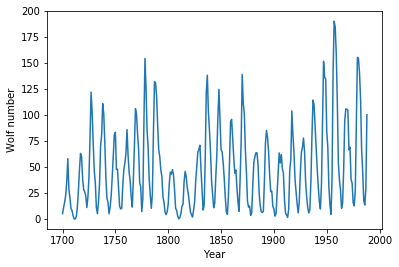

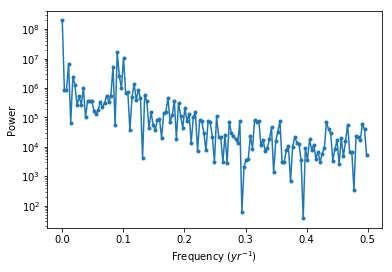

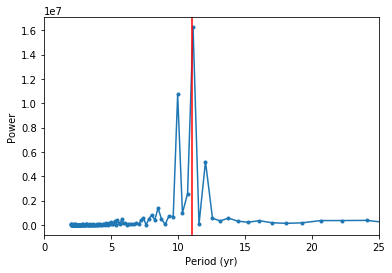

In [39]:
wolf = np.loadtxt("sunspots.txt")
year = 1700 + np.arange(len(wolf))
plt.plot(year, wolf)
plt.xlabel("Year")
plt.ylabel("Wolf number")
plt.show()

freqs, power, phase = get_spectra(wolf)
plt.plot(freqs, power, ".-")
plt.xlabel("Frequency ($yr^{-1}$)"); plt.ylabel("Power")
plt.yscale("log")
plt.show()

# plot power vs period for period < 25yr - ignore the constant term to avoid infinity
plt.plot(1.0 / freqs[1:], power[1:], ".-")
plt.axvline(11, color="r")
plt.xlim([0.0, 25.0])
plt.xlabel("Period (yr)"); plt.ylabel("Power")
#plt.xscale("log")
plt.show()

## Approximating timeseries using $N$ Fourier terms
Remember that a signal is information, and the power of signal is "amount" of information. For example, when the signal-to-noise ratio is very low, there isn't much to say about the data. The power spectum informs us at which frequencies most of the power, or information, resides. What if we discard all but the $N$ most prominent frequencies? Will that allow us to reconstruct the signal?

Using frequencies: [ 0.03460208  0.02076125  0.11764706  0.01730104  0.09342561  0.08304498
  0.01038062  0.10034602  0.0899654   0.        ]


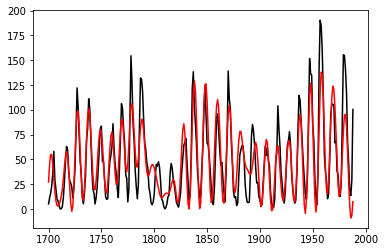

In [33]:
# Select only N significant terms

N = 10
ascending_indices = np.argsort(power)
significant = ascending_indices[-N:]

new_freqs = freqs[significant]
new_power = power[significant]
new_phase = phase[significant]
print "Using frequencies:", new_freqs

approximation = reconstruct(len(year), new_freqs, powers=new_power, phases=new_phase)
plt.plot(year, wolf, "k-")
plt.plot(year, approximation, "r-")
plt.show()